# Mcdonald's fast food market segmentation

In [1]:
import pandas as pd

In [2]:
mcdonalds=pd.read_csv('mcdonalds.csv')

### Column Names

In [6]:
mcdonalds.columns.to_list()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

### Dataset Dim

In [7]:
mcdonalds.shape

(1453, 15)

In [8]:
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [9]:
MD_x=mcdonalds.iloc[:,0:11]
MD_x=(MD_x=="Yes").astype(int)
MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [10]:
col_means=MD_x.mean().round(2)
col_means

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [23]:
from sklearn.decomposition import PCA
import numpy as np


In [12]:
pca=PCA()
pca_result=pca.fit_transform(MD_x)

In [29]:
sd=np.sqrt(pca.explained_variance_)
variance=pca.explained_variance_ratio_
flag=0
cum_variance=[]
for i in variance:
    flag+=i
    cum_variance.append(flag)


[0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284] [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326] [0.2994472318789256, 0.49224444561140945, 0.6252897974656134, 0.7083855755912689, 0.7678660983178569, 0.818165659697786, 0.8620147594245698, 0.9015625505974899, 0.9383234478866491, 0.970676738607114, 1.0]


In [37]:
names=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11"]
summary=pd.DataFrame({"Standard deviation":sd,"Proportion of Variance":variance,"Cumulative Proportion":cum_variance},index=names).round(4)

In [38]:
summary.T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Standard deviation,0.7570,0.6075,0.5046,0.3988,0.3374,0.3103,0.2897,0.2751,0.2653,0.2488,0.2369
Proportion of Variance,0.2994,0.1928,0.1330,0.0831,0.0595,0.0503,0.0438,0.0395,0.0368,0.0324,0.0293
Cumulative Proportion,0.2994,0.4922,0.6253,0.7084,0.7679,0.8182,0.8620,0.9016,0.9383,0.9707,1.0000


In [60]:
components_df=pd.DataFrame(pca.components_,columns=MD_x.columns,index=names).round(4)
components_df=components_df.T*-1
components_df['PC1'].tolist()

[0.4769,
 0.1553,
 0.0064,
 -0.1162,
 -0.3044,
 0.1085,
 0.3372,
 0.4715,
 -0.329,
 0.2137,
 -0.3748]

In [43]:
import matplotlib.pyplot as plt

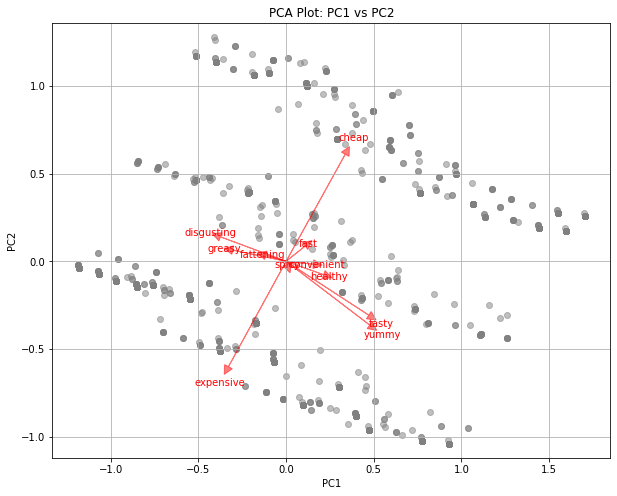

In [62]:
plt.figure(figsize=(10,8))
plt.scatter(pca_result[:,0],pca_result[:,1],c='grey',alpha=0.5)

for i in range(MD_x.shape[1]):
    plt.arrow(0,0,components_df.iloc[i,0],components_df.iloc[i,1].tolist(),
              color='r',alpha=0.5,head_width=0.05,head_length=0.05)
    plt.text(components_df.iloc[i,0]*1.15,components_df.iloc[i,1]*1.15,MD_x.columns[i],
             color='r',ha='center',va='center')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot: PC1 vs PC2')
plt.grid(True)
plt.axis('equal')
plt.show()

### Step 5:

In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [308]:
kmeans_list=[]
kmeans_labels=[]
kmeans_centroids=[]

for i in range(1,9):
    kmeans=KMeans(n_clusters=i,n_init=10,random_state=1234)
    kmeans.fit(MD_x)
    kmeans_list.append(kmeans.inertia_)
    kmeans_labels.append(kmeans.labels_)
    kmeans_centroids.append(kmeans.cluster_centers_)
    


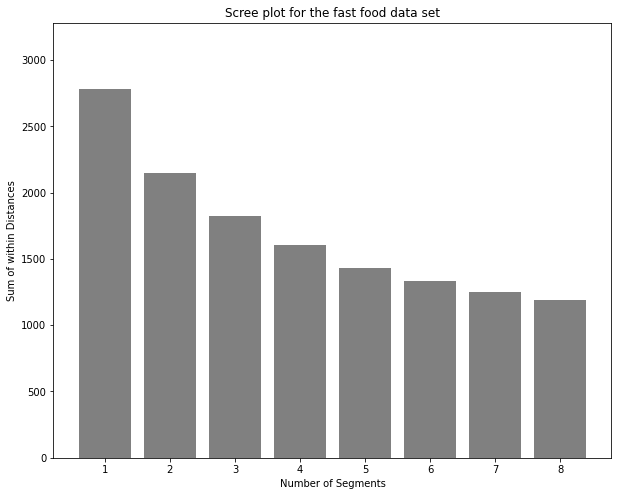

In [72]:
plt.figure(figsize=(10,8))
plt.bar(range(1,9),kmeans_list,color='grey')
plt.ylim(0,max(kmeans_list)+500)

plt.xlabel('Number of Segments')
plt.ylabel('Sum of within Distances')
plt.title('Scree plot for the fast food data set')

plt.show()


In [96]:
for i in range(1,9):
    for _ in range(10):
        a=MD_x.sample(frac=1,replace=True)
        kmeans_boot = KMeans(n_clusters=i, n_init=10, random_state=np.random.randint(10000))
        kmeans_boot.fit(a)
        boot_labels = kmeans_boot.predict(MD_x)
    print(adjusted_rand_score(kmeans_labels[i-1],boot_labels))
    

1.0
0.983488081735385
0.9465087913352146
0.8089692827076773
0.9844810289137222
0.8681430790064858
0.796413338070586
0.6425630432779341


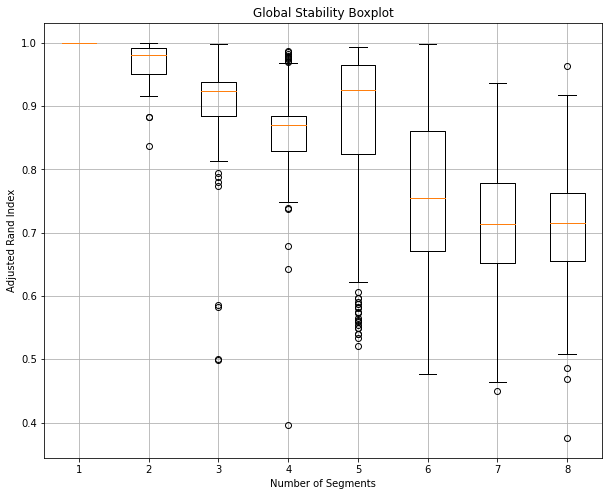

In [98]:
def boot_kmeans(data, n_clusters_range, n_boot, kmeans_labels):
    rand_indices = {n_clusters: [] for n_clusters in n_clusters_range}
    
    for n_clusters in n_clusters_range:
        original_labels = kmeans_labels[n_clusters - 1]  # Adjust index for range starting at 1
        
        for _ in range(n_boot):
            boot_sample = data.sample(frac=1, replace=True)
            kmeans_boot = KMeans(n_clusters=n_clusters, n_init=10, random_state=np.random.randint(10000))
            kmeans_boot.fit(boot_sample)
            boot_labels = kmeans_boot.predict(data)
            
            rand_index = adjusted_rand_score(original_labels, boot_labels)
            rand_indices[n_clusters].append(rand_index)
    
    return rand_indices

# Perform bootstrapping and calculate adjusted Rand index for 1 to 9 clusters
n_clusters_range = range(1, 9)
n_boot = 100
rand_indices = boot_kmeans(MD_x, n_clusters_range, n_boot, kmeans_labels)

# Create a boxplot for adjusted Rand index
plt.figure(figsize=(10, 8))
plt.boxplot([rand_indices[n_clusters] for n_clusters in n_clusters_range], labels=n_clusters_range)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability Boxplot')
plt.grid(True)
plt.show()

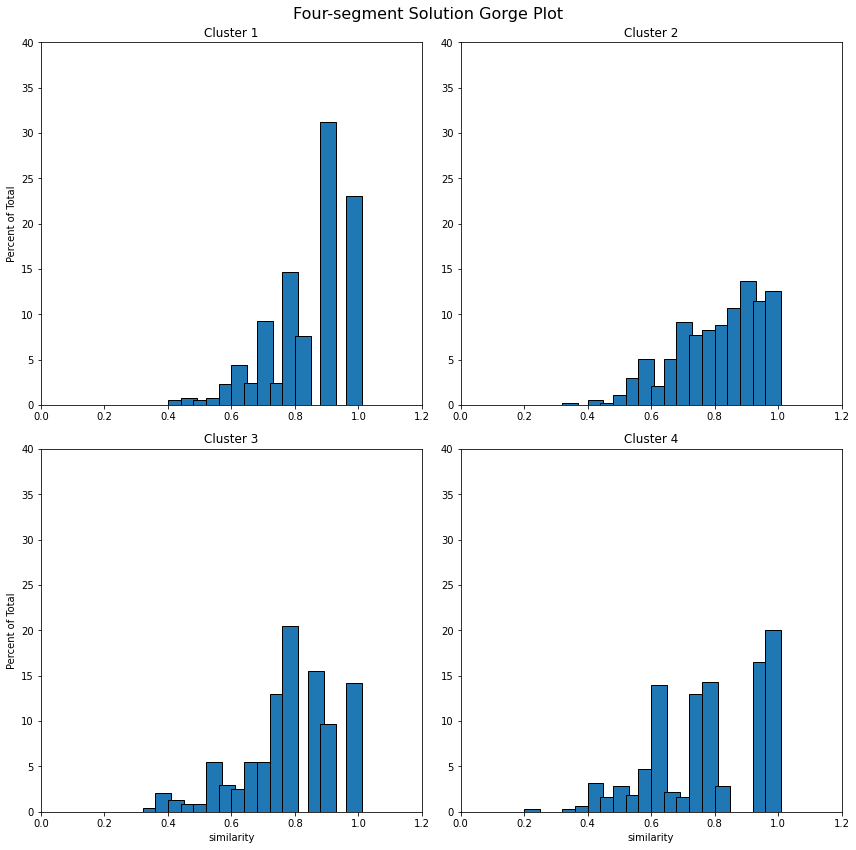

In [133]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import MinMaxScaler





centroids = kmeans_centroids[3]
distances = euclidean_distances(MD_x, centroids)
scaler = MinMaxScaler()
similarities = scaler.fit_transform(distances)
similarities = 1-similarities  


fig, axs = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Four-segment Solution Gorge Plot', fontsize=16)

for i in range(4):
    row = i // 2
    col = i % 2
    cluster_similarities = similarities[kmeans_labels[3] == i, i]
    
    
    hist, bin_edges = np.histogram(cluster_similarities, bins=25, range=(0, 1))
    percentage = (hist / len(cluster_similarities)) * 100
    
    axs[row, col].bar(bin_edges[:-1], percentage, width=0.05, edgecolor='black', align='edge')
    axs[row, col].set_title(f'Cluster {i+1}')
    axs[row, col].set_xlim(0, 1.2)
    axs[row, col].set_ylim(0, 40)
    
    if row == 1:
        axs[row, col].set_xlabel('similarity')
    if col == 0:
        axs[row, col].set_ylabel('Percent of Total')

plt.tight_layout()
plt.show()

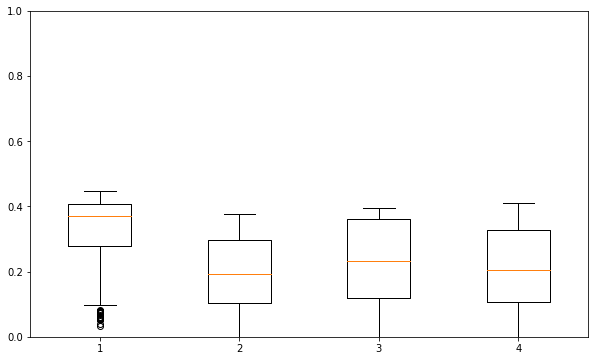

In [141]:
from sklearn.metrics import silhouette_samples

def slswFlexclust(X,labels):
    silhouette_vals=silhouette_samples(X,labels)
    return [silhouette_vals[labels==i] for i  in range(len(np.unique(labels)))]

slsw=slswFlexclust(MD_x,kmeans_labels[3])

plt.figure(figsize=(10,6))
plt.boxplot(slsw,labels=range(1,len(slsw)+1))
plt.ylim(0,1)
plt.show()

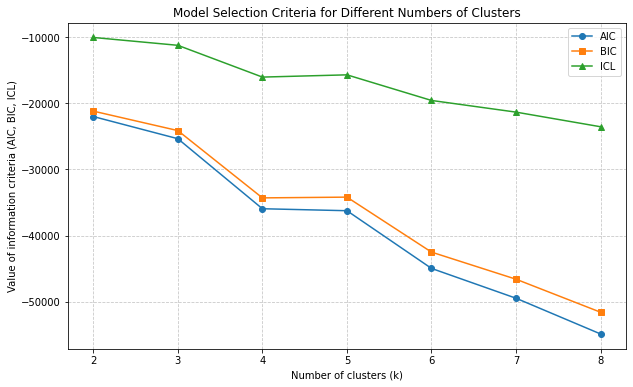

In [165]:
from sklearn.mixture import GaussianMixture



n_clusters_range = range(2, 9)
aic = []
bic = []
log_likelihood = []

for n_clusters in n_clusters_range:
    gmm = GaussianMixture(n_components=n_clusters, n_init=10, random_state=1234)
    gmm.fit(MD_x)
    
    aic.append(gmm.aic(MD_x))
    bic.append(gmm.bic(MD_x))
    log_likelihood.append(gmm.score(MD_x) * len(MD_x))


icl=[i+j for i,j in zip(bic,log_likelihood)]
k_values=n_clusters_range

plt.figure(figsize=(10, 6))
plt.plot(k_values, aic, marker='o', label='AIC')
plt.plot(k_values, bic, marker='s', label='BIC')
plt.plot(k_values, icl, marker='^', label='ICL')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Value of information criteria (AIC, BIC, ICL)')
plt.title('Model Selection Criteria for Different Numbers of Clusters')
plt.legend()
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [160]:

from sklearn.mixture import GaussianMixture

labels = kmeans_labels[3]


gmm = GaussianMixture(n_components=4, n_init=10, random_state=1234)
gmm.fit(MD_x)
gmm_labels = gmm.predict(MD_x)


comparison_df = pd.DataFrame({'kmeans': kmeans_labels, 'mixture': gmm_labels})


contingency_table = pd.crosstab(comparison_df['kmeans'], comparison_df['mixture'])

print("Contingency Table:")
print(contingency_table)


Contingency Table:
mixture    0   1   2    3
kmeans                   
0        449   3  46   28
1        288  36   9   40
2          0  87   0  152
3          0   6  71  238


In [166]:
gmm1 = GaussianMixture(n_components=4, n_init=10, random_state=1234)
gmm1.fit(MD_x)
log_lik1 = gmm1.score(MD_x) * len(MD_x)  

gmm2 = GaussianMixture(n_components=4, n_init=10, random_state=5678)
gmm2.fit(MD_x)
log_lik2 = gmm2.score(MD_x) * len(MD_x)  

print(f"Log-likelihood for the first Gaussian Mixture Model: {log_lik1}")
print(f"Log-likelihood for the second Gaussian Mixture Model: {log_lik2}")

Log-likelihood for the first Gaussian Mixture Model: 18280.1151013434
Log-likelihood for the second Gaussian Mixture Model: 22194.366350611228


In [168]:
mcdonalds['Like'].value_counts().sort_index(ascending=False)

I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: Like, dtype: int64

In [180]:
like_mapping = {
    'I love it!+5': 5,
    'I hate it!-5': -5,
    '+4': 4,
    '+3': 3,
    '+2': 2,
    '+1': 1,
    '0': 0,
    '-1': -1,
    '-2': -2,
    '-3': -3,
    '-4': -4
}
mcdonalds['Like_n']=mcdonalds['Like'].map(like_mapping)
mcdonalds['Like_n'].value_counts().sort_index()

-5    152
-4     71
-3     73
-2     59
-1     58
 0    169
 1    152
 2    187
 3    229
 4    160
 5    143
Name: Like_n, dtype: int64

In [182]:
gmm=GaussianMixture(n_components=2,n_init=10,random_state=1234)
gmm.fit(MD_x)

labels=gmm.predict(MD_x)
cluster_sized=pd.Series(labels).value_counts()
print(f"Cluster size: \n {cluster_sized}")
print(f"Convergence after {gmm.n_iter_} iterations: {gmm.converged_}")

Cluster size: 
 1    985
0    468
dtype: int64
Convergence after 5 iterations: True


In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

log_reg_results={}
for cluster in np.unique(labels):
    cluster_indices=np.where(labels==cluster)[0]
  
    X_cluster=MD_x.iloc[cluster_indices]
    y_cluster=mcdonalds['Like_n'].iloc[cluster_indices]
    log_reg=LogisticRegression(max_iter=1000)
    log_reg.fit(X_cluster,y_cluster)

    log_reg_results[cluster] = {
        "coefficients": log_reg.coef_,
        "intercept": log_reg.intercept_,
    }


for cluster, result in log_reg_results.items():
    print(f"Cluster {cluster} results:")
    print(f"Intercept: {result['intercept']}")
    for i, coef in enumerate(result['coefficients'][0]):
        print(f"Coefficient for feature {i}: {coef}")

Cluster 0 results:
Intercept: [ 2.1467044  -0.5029133   1.23585326  0.33225484  0.77845263  1.38453246
  0.26030557 -0.63835265 -2.13312159 -1.11847718 -1.74523844]
Coefficient for feature 0: -1.633325741744985
Coefficient for feature 1: -1.091489370156621
Coefficient for feature 2: -0.1463875014185441
Coefficient for feature 3: -0.24368151261952295
Coefficient for feature 4: 0.12250981653555593
Coefficient for feature 5: -0.1524313648080091
Coefficient for feature 6: 0.05546706165900643
Coefficient for feature 7: -0.9505092621539234
Coefficient for feature 8: 0.18632228386310934
Coefficient for feature 9: -0.36321756354481566
Coefficient for feature 10: 1.4220583580918482
Cluster 1 results:
Intercept: [-0.85288024 -0.20407487 -0.15917363  0.46803411  0.38768912  1.54407753
  0.6557797   1.10972657  0.95079631 -1.40619984 -2.49377477]
Coefficient for feature 0: -1.2099479463312317
Coefficient for feature 1: -0.0009410331136243103
Coefficient for feature 2: 0.8685286360906378
Coefficien

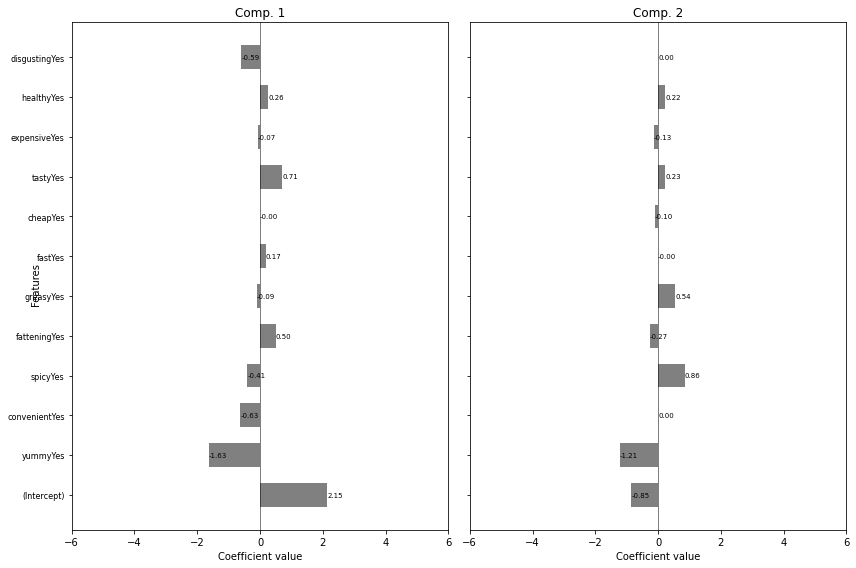

In [229]:
features=['(Intercept)', 'yummyYes', 'convenientYes', 'spicyYes', 'fatteningYes', 
                'greasyYes', 'fastYes', 'cheapYes', 'tastyYes', 'expensiveYes', 
                'healthyYes', 'disgustingYes']
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,8),sharey=True)
fig.subplots_adjust(wspace=0)

def plot_coef(ax, coef, title):
    ax.axvline(0, color='black', linewidth=0.5)
    ax.barh(features, coef, height=0.6, color='gray')
    ax.set_xlabel('Coefficient value')
    ax.set_title(title)
    ax.tick_params(axis='y', which='major', labelsize=8)
    for i, v in enumerate(coef):
        ax.text(v, i, f'{v:.2f}', va='center', fontsize=7)
coef1=np.diag(log_reg_results[0]['coefficients'])
coef1=np.insert(coef1,0,log_reg_results[0]['intercept'][0])
coef2=np.diag(log_reg_results[1]['coefficients'])
coef2=np.insert(coef2,0,log_reg_results[1]['intercept'][0])

plot_coef(ax1,coef1,'Comp. 1')
ax1.invert_yaxis()

plot_coef(ax2,coef2,'Comp. 2')
ax2.invert_yaxis()

fig.text(0.04, 0.5, 'Features', va='center', rotation='vertical')

# Set x-axis limits to match the image
ax1.set_xlim(-6, 6)
ax2.set_xlim(-6, 6)

plt.tight_layout()
plt.show()


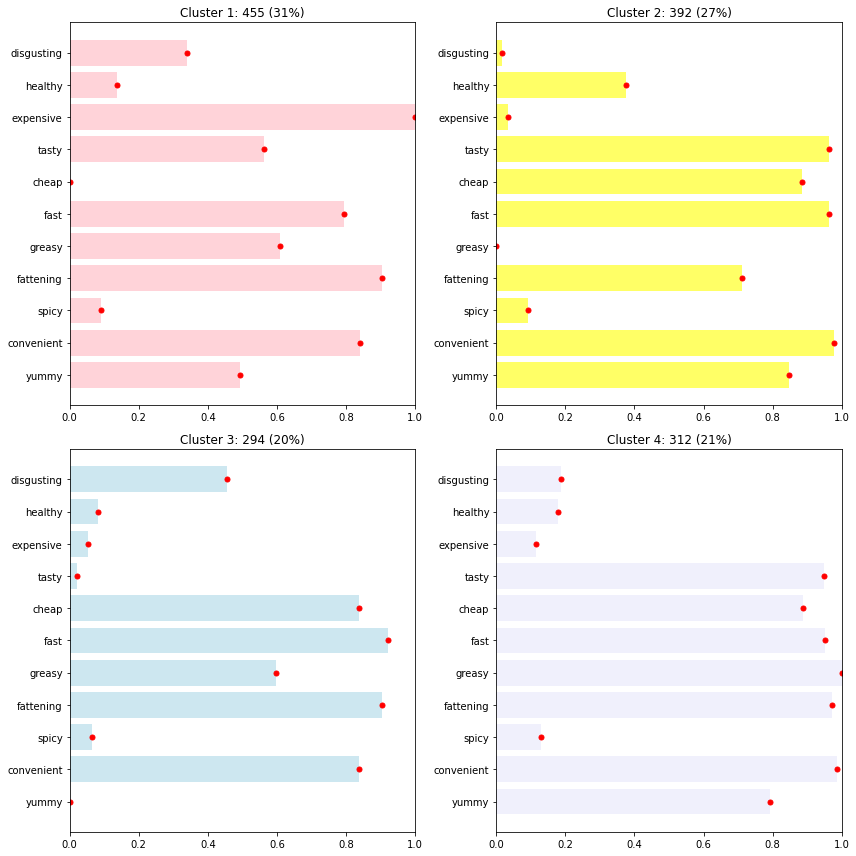

In [235]:

gmm=GaussianMixture(4,random_state=1234)
cluster_labels=gmm.fit_predict(MD_x)
cluster_means=MD_x.groupby(cluster_labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.ravel()

attributes = MD_x.columns
colors = ['lightpink', 'yellow', 'lightblue', 'lavender']

for i in range(4):
    ax = axs[i]
    cluster_data = cluster_means.iloc[i]
    
    ax.barh(attributes, cluster_data, color=colors[i], alpha=0.6)
    ax.set_xlim(0, 1)
    ax.set_title(f'Cluster {i+1}: {sum(cluster_labels == i)} ({sum(cluster_labels == i)/len(cluster_labels):.0%})')
    
    # Add markers (you'll need to customize this based on your specific requirements)
    for j, value in enumerate(cluster_data):
        ax.plot(value, j, 'ro', markersize=5)

plt.tight_layout()
plt.show()

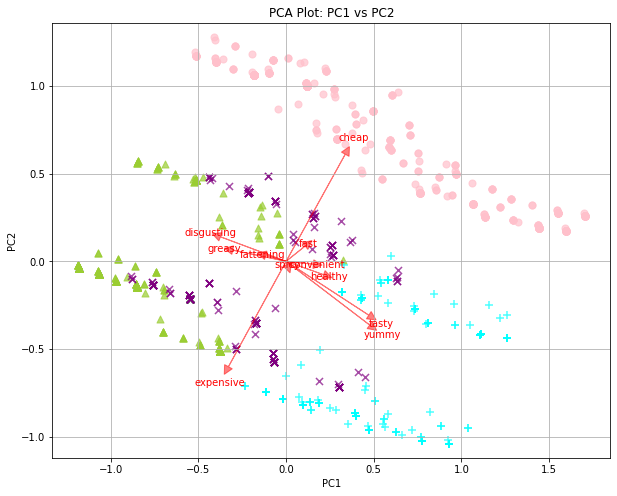

In [237]:
plt.figure(figsize=(10,8))


markers = ['o', '^', '+', 'x']
colors = ['pink', 'yellowgreen', 'cyan', 'purple']

for i in range(4):
    cluster_points=pca_result[cluster_labels==i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                marker=markers[i], c=colors[i], s=50, alpha=0.7,
                label=f'Cluster {i+1}')

for i in range(MD_x.shape[1]):
    plt.arrow(0,0,components_df.iloc[i,0],components_df.iloc[i,1].tolist(),
              color='r',alpha=0.5,head_width=0.05,head_length=0.05)
    plt.text(components_df.iloc[i,0]*1.15,components_df.iloc[i,1]*1.15,MD_x.columns[i],
             color='r',ha='center',va='center')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot: PC1 vs PC2')
plt.grid(True)
plt.axis('equal')
plt.show()

<Figure size 720x576 with 0 Axes>

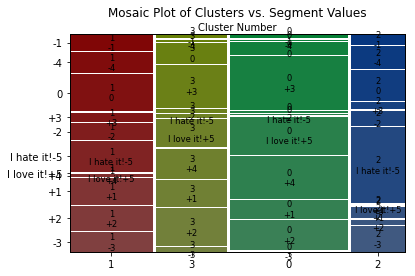

In [270]:
from statsmodels.graphics.mosaicplot import mosaic

df_like=pd.DataFrame({
    'Cluster': kmeans_labels[3],
    'Like':mcdonalds['Like']
})


plt.figure(figsize=(10,8))
mosaic(df_like,['Cluster','Like'],title='Mosaic Plot of Clusters vs. Segment Values', gap=0.01,labelizer=None)
plt.xlabel('Cluster Number')
plt.ylabel('Segment Value')
plt.show()

<Figure size 720x576 with 0 Axes>

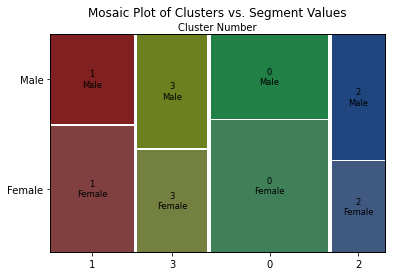

In [277]:
df_gender=pd.DataFrame({
    'Cluster': kmeans_labels[3],
    'Gender':mcdonalds['Gender']
})


plt.figure(figsize=(10,8))
mosaic(df_gender,['Cluster','Gender'],title='Mosaic Plot of Clusters vs. Segment Values', gap=0.01,labelizer=None)
plt.xlabel('Cluster Number')
plt.ylabel('Segment Value')
plt.show()

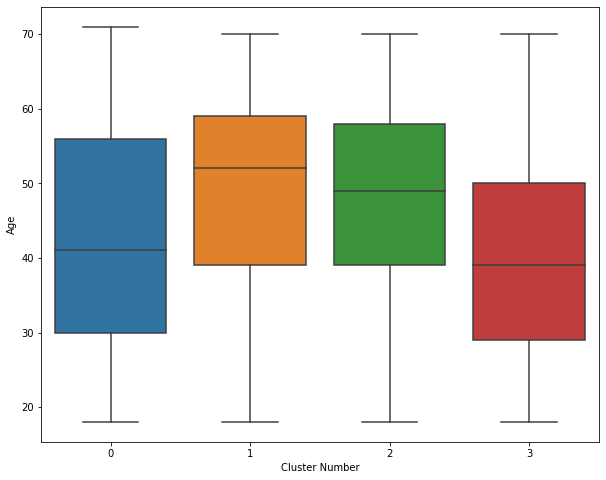

In [276]:
df_age=pd.DataFrame({
    'Cluster': kmeans_labels[3],
    'Age':mcdonalds['Age']
})


plt.figure(figsize=(10,8))
sns.boxplot(x='Cluster',y='Age',data=df_age)
plt.xlabel('Cluster Number')
plt.ylabel('Age')
plt.show()

Cluster
0    3.009506
1    1.721180
2    1.410042
3    2.860317
Name: VisitFrequency, dtype: float64
Cluster
0    2.866920
1   -1.136729
2   -2.686192
3    2.180952
Name: Like, dtype: float64


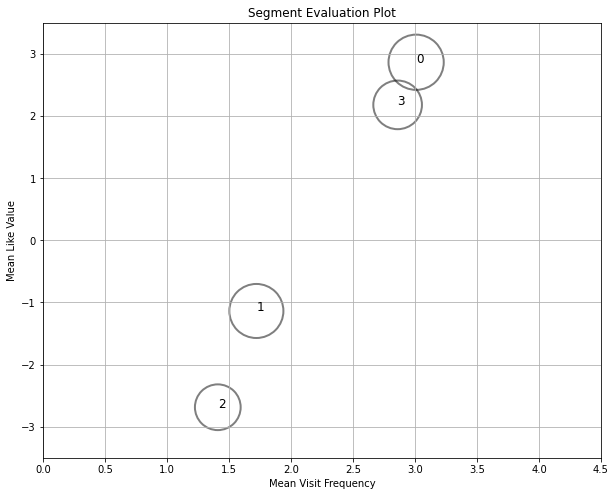

In [307]:
mapping = {
    'Every three months':2,
    'Once a week': 4,
    'Once a month': 3,
    'Once a year': 1,
    'More than once a week': 5,
    'Never': 0
}
mcdonalds['VisitFrequency_encoded']=mcdonalds['VisitFrequency'].map(mapping)
df=pd.DataFrame({
    'Cluster':kmeans_labels[3],
    'VisitFrequency':mcdonalds['VisitFrequency_encoded'],
    'Like':mcdonalds['Like_n'],
    'Gender':mcdonalds['Gender']
})
visit_mean=df.groupby('Cluster')['VisitFrequency'].mean()
print(visit_mean)
like_mean = df.groupby('Cluster')['Like'].mean()
print(like_mean)
female_proportion = df[df['Gender'] == 'Female'].groupby('Cluster').size() / df.groupby('Cluster').size()

female_proportion = female_proportion.reindex(visit_mean.index, fill_value=0)


plt.figure(figsize=(10, 8))
plt.scatter(visit_mean, like_mean, s=5000*female_proportion, alpha=0.5,linewidths=2,edgecolors='black',facecolor='none')


for i, cluster in enumerate(visit_mean.index):
    plt.text(visit_mean[cluster], like_mean[cluster], str(cluster), fontsize=12)

plt.xlabel('Mean Visit Frequency')
plt.ylabel('Mean Like Value')
plt.title('Segment Evaluation Plot')
plt.xlim(0, 4.5)
plt.ylim(-3.5, 3.5)
plt.grid(True)
plt.show()